In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import mean_squared_error

In [2]:
!python prepareData.py --config NYC_new_astgcn.conf

Read configuration file: NYC_new_astgcn.conf
(54, 172, 4, 1) (18, 172, 4, 1) (17, 172, 4, 1)
mean.shape: (1, 1, 1)
std.shape: (1, 1, 1)
****************************************************************************************************
mean.shape: (1, 1, 4, 1)
std.shape: (1, 1, 4, 1)
train x: (54, 172, 4, 1)
train target: (54, 172, 1)
train timestamp: (54,)

val x: (18, 172, 4, 1)
val target: (18, 172, 1)
val timestamp: (18,)

test x: (17, 172, 4, 1)
test target: (17, 172, 1)
test timestamp: (17,)

train data _mean : (1, 1, 4, 1) [[[[43416.27906977]
   [86369.85685278]
   [  241.30458441]
   [ 6013.81664513]]]]
train data _std : (1, 1, 4, 1) [[[[23724.26426293]
   [35431.39926155]
   [  389.0407519 ]
   [ 9450.05620739]]]]
save file: NYC_new_r1_d0_w0_astcgn


In [3]:
!python train_ASTGCN_r.py --config NYC_new_astgcn.conf

Read configuration file: NYC_new_astgcn.conf
CUDA: False cuda:0
folder_dir: astgcn_r_h1d0w0_channel4_1.000000e-04
params_path: experiments\NYC\astgcn_r_h1d0w0_channel4_1.000000e-04
load file: NYC_new_r1_d0_w0_astcgn
train: torch.Size([54, 172, 4, 1]) torch.Size([54, 172, 1])
val: torch.Size([18, 172, 4, 1]) torch.Size([18, 172, 1])
test: torch.Size([17, 172, 4, 1]) torch.Size([17, 172, 1])
delete the old one and create params directory experiments\NYC\astgcn_r_h1d0w0_channel4_1.000000e-04
param list:
CUDA	 cuda:0
in_channels	 4
nb_block	 1
nb_chev_filter	 16
nb_time_filter	 16
time_strides	 1
batch_size	 17
graph_signal_matrix_filename	 NYC_new.npz
start_epoch	 0
epochs	 400
ASTGCN_submodule(
  (BlockList): ModuleList(
    (0): ASTGCN_block(
      (TAt): Temporal_Attention_layer()
      (SAt): Spatial_Attention_layer()
      (cheb_conv_SAt): cheb_conv_withSAt(
        (Theta): ParameterList(  (0): Parameter containing: [torch.float32 of size 4x16])
      )
      (time_conv): Conv2d(16,

C:\Users\47183\OneDrive\Documents\GitHub\ads-spring2023-project5\doc\utils.py:110: RuntimeWarning: invalid value encountered in true_divide
  return (2 * L) / lambda_max - np.identity(W.shape[0])



validation batch 1 / 2, loss: 1.71
validation batch 2 / 2, loss: 1.37
save parameters to file: experiments\NYC\astgcn_r_h1d0w0_channel4_1.000000e-04\epoch_148.params
validation batch 1 / 2, loss: 1.70
validation batch 2 / 2, loss: 1.37
save parameters to file: experiments\NYC\astgcn_r_h1d0w0_channel4_1.000000e-04\epoch_149.params
validation batch 1 / 2, loss: 1.69
validation batch 2 / 2, loss: 1.36
save parameters to file: experiments\NYC\astgcn_r_h1d0w0_channel4_1.000000e-04\epoch_150.params
validation batch 1 / 2, loss: 1.69
validation batch 2 / 2, loss: 1.36
save parameters to file: experiments\NYC\astgcn_r_h1d0w0_channel4_1.000000e-04\epoch_151.params
validation batch 1 / 2, loss: 1.68
validation batch 2 / 2, loss: 1.35
save parameters to file: experiments\NYC\astgcn_r_h1d0w0_channel4_1.000000e-04\epoch_152.params
validation batch 1 / 2, loss: 1.67
validation batch 2 / 2, loss: 1.35
save parameters to file: experiments\NYC\astgcn_r_h1d0w0_channel4_1.000000e-04\epoch_153.params
val

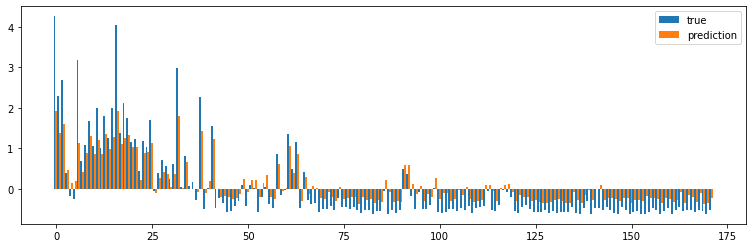

In [4]:
out1 = np.load('experiments/NYC/astgcn_r_h1d0w0_channel4_1.000000e-04/output_epoch_399_test.npz')
pred = out1['prediction'][:,:,0].mean(axis=0)
true_y = out1['data_target_tensor'][:,:,0].mean(axis=0)

plt.figure(figsize = (13,4))
xxx = np.arange(len(pred))
plt.bar(xxx-0.5,true_y[xxx],0.5,label = 'true')
plt.bar(xxx,pred[xxx],0.5,label = 'prediction')

plt.legend()
plt.show()

In [5]:
print(((true_y[xxx]-pred[xxx])**2).mean())
print(np.corrcoef(true_y[xxx],pred[xxx]))

0.19719824
[[1.         0.96313439]
 [0.96313439 1.        ]]
